### Market Segmentation Analysis: Case Study (Fast Food)

The purpose of this case study is to offer illustration of market segmentation analysis using a different empirical data set. The dataset for <br>
this case study is obtained from the book “Market Segmentation Analysis - Understanding It, Doing It, and Making It Useful” is written by Sara <br> Dolnicar, Bettina Grün and Friedrich Leisch.

#### Collecting Data

The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following <br> attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute). <br>
In addition, respondents indicated their AGE and GENDER. Had this data been collected for a real market segmentation study, additional information – such as details about their dining out behaviour, and their use of information channels –
would have been collected to enable the development of a richer and more detailed description of each market segment.

#### Exploring Data

First we explore the key characteristics of the data set by loading the data set and inspecting basic features such as the variable names, the <br> sample size, and the first five rows of the data:

In [107]:
# Importing Libraries
import pandas as pd
import numpy as np

mcdonalds_df = pd.read_csv('dataset/mcdonalds.csv')

In [108]:
# Listing the variables names in the dataset
mcdonalds_df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [109]:
# Printing the dimensions of the dataset 
mcdonalds_df.shape

(1453, 15)

In [110]:
# Getting the First five rows of the dataset
mcdonalds_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


As we can see from the output, the first respondent believes that McDonald’s is not
yummy, convenient, not spicy, fattening, not greasy, fast, cheap, not tasty, expensive,
not healthy and not disgusting. This same respondent does not like McDonald’s
(rating of −3), is 61 years old, eats atMcDonald’s every three months and is female.
This quick glance at the data shows that the segmentation variables (perception
of McDonald’s) are verbal, not numeric. This means that they are coded using
the words YES and NO. This is not a suitable format for segment extraction. We
need numbers, not words. To get numbers, we slice the segmentation variables and convert them from verbal YES/NO to numeric binary.

In [111]:
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder
from sklearn.compose import make_column_transformer

cat_col_names = mcdonalds_df.columns[:11]

mcdonalds_dfTransformed = make_column_transformer(
    (OrdinalEncoder(dtype='int'), cat_col_names),
    remainder='passthrough')

In [112]:
df_transformed = pd.DataFrame(mcdonalds_dfTransformed.fit_transform(mcdonalds_df), columns=mcdonalds_df.columns)

In [113]:
# Checking the mean of the segmentation variables
df_transformed[cat_col_names].mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [114]:
from sklearn.decomposition import PCA
mc_donalds_pca = PCA(n_components=11)
pca_components = mc_donalds_pca.fit_transform(df_transformed[cat_col_names])
df_components = pd.DataFrame(data=pca_components, columns=["PC"+str(i) for i in range(1,12)])

In [115]:
# Gathering data for checking the importance of components
std_components = df_components.std()
var_components = mc_donalds_pca.explained_variance_ratio_
cumvar_components = var_components.cumsum()
imp_components = pd.DataFrame()
imp_components["Standard Deviation"] = std_components
imp_components["Proportion of Variance"] = var_components
imp_components["Cumulative Proportion"] = cumvar_components
imp_components

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


Results from principal components analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables.

In [116]:
df_components_factor = pd.DataFrame(data=mc_donalds_pca.components_, columns=["PC"+str(i) for i in range(1,12)])

In [117]:
df_components_factor.transpose()
df_components_factor["Variable"] = cat_col_names.values
df_components_factor = df_components_factor.set_index("Variable")
df_components_factor

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Variable,,,,,,,,,,,
yummy,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
convenient,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
spicy,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
fattening,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
greasy,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
fast,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
cheap,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
tasty,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
expensive,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483


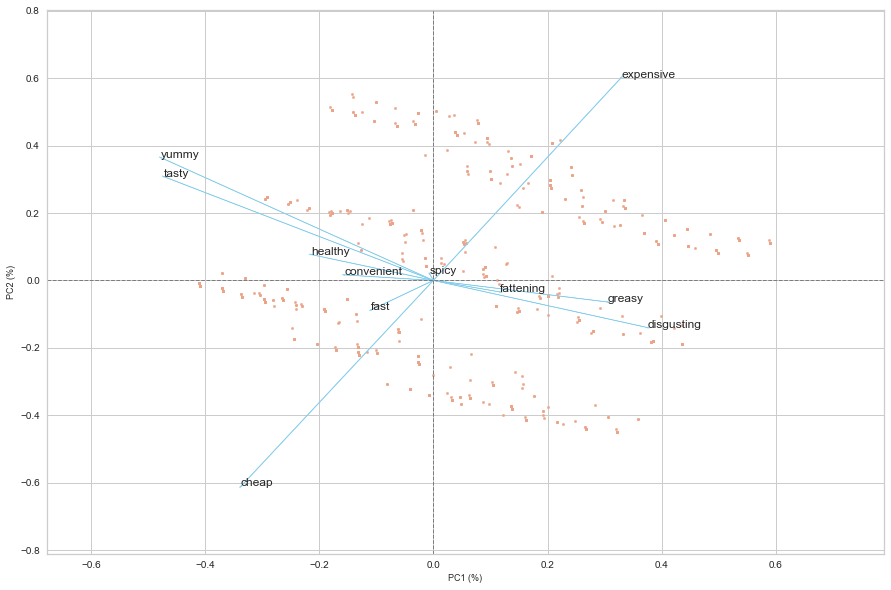

In [118]:
# Reference https://www.reneshbedre.com/blog/principal-component-analysis.html
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pca_components, loadings=mc_donalds_pca.components_, labels=cat_col_names, var1="", var2="", show=True, dim=(15,10))

#### Extracting Segments

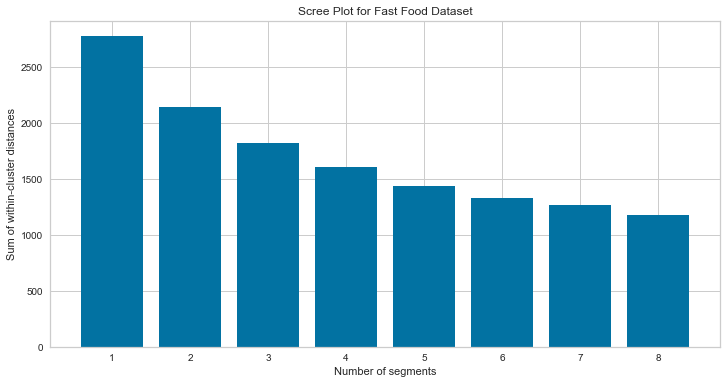

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)
n_clusters = range(1,9)
km = KMeans()
cluster_dist = []
for k in n_clusters:
    km.set_params(n_clusters=k)
    km.fit(df_transformed[cat_col_names])
    cluster_dist.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.bar(range(1, 9), cluster_dist)
plt.title("Scree Plot for Fast Food Dataset")
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.show()



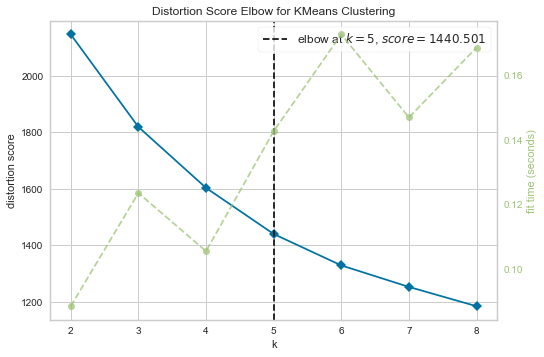

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9)).fit(df_transformed[cat_col_names])
visualizer.show()

In [121]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_transformed[cat_col_names])
mcdonalds_df["cluster_labels"]=kmeans.labels_

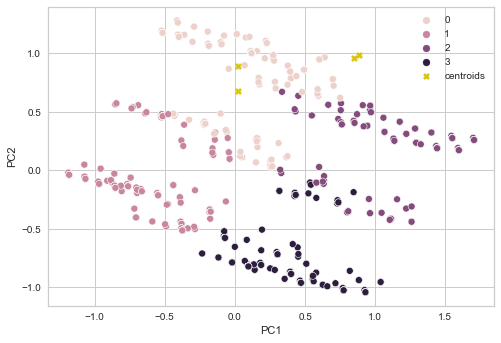

In [122]:
import seaborn as sns
sns.scatterplot(data=df_components, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="y", s=40, label="centroids")
plt.legend()
plt.show()

<Figure size 1080x432 with 0 Axes>

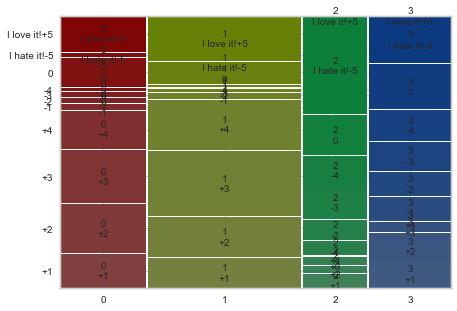

In [129]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(mcdonalds_df['cluster_labels'],mcdonalds_df['Like'])
#MOSAIC PLOT
plt.figure(figsize=(15,6))
mosaic(crosstab.stack())
plt.show()

In [126]:
crosstab_gender =pd.crosstab(mcdonalds_df['cluster_labels'],mcdonalds_df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_labels,,
0,155,169
1,349,231
2,101,140
3,183,125


<Figure size 1080x432 with 0 Axes>

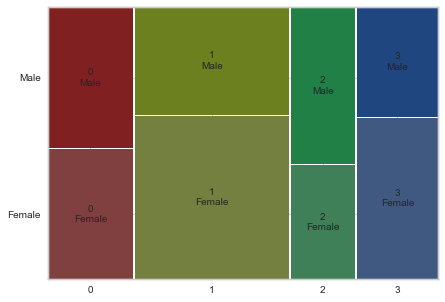

In [128]:
plt.figure(figsize=(15,6))
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:xlabel='cluster_labels', ylabel='Age'>

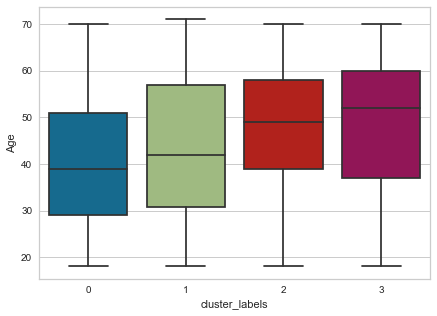

In [130]:
sns.boxplot(x="cluster_labels", y="Age", data=mcdonalds_df)

In [143]:
from sklearn.preprocessing import LabelEncoder
#Calculating the mean
mcdonalds_df['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds_df['VisitFrequency'])
visit = mcdonalds_df.groupby('cluster_labels')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_labels,VisitFrequency
0,0,2.540123
1,1,2.584483
2,2,2.668050
3,3,2.818182


In [145]:
mcdonalds_df['Like'] = LabelEncoder().fit_transform(mcdonalds_df['Like'])
like = mcdonalds_df.groupby('cluster_labels')['Like'].mean()
like = like.to_frame().reset_index()
like


,cluster_labels,Like
0,0,3.808642
1,1,3.794828
2,2,6.763485
3,3,5.428571


In [146]:
mcdonalds_df['Gender'] = LabelEncoder().fit_transform(mcdonalds_df['Gender'])
gender = mcdonalds_df.groupby('cluster_labels')['Gender'].mean()
gender = gender.to_frame().reset_index()
gender


,cluster_labels,Gender
0,0,0.521605
1,1,0.398276
2,2,0.580913
3,3,0.405844


In [147]:
segment = gender.merge(like, on='cluster_labels', how='left').merge(visit, on='cluster_labels', how='left')
segment

,cluster_labels,Gender,Like,VisitFrequency
0,0,0.521605,3.808642,2.540123
1,1,0.398276,3.794828,2.584483
2,2,0.580913,6.763485,2.668050
3,3,0.405844,5.428571,2.818182


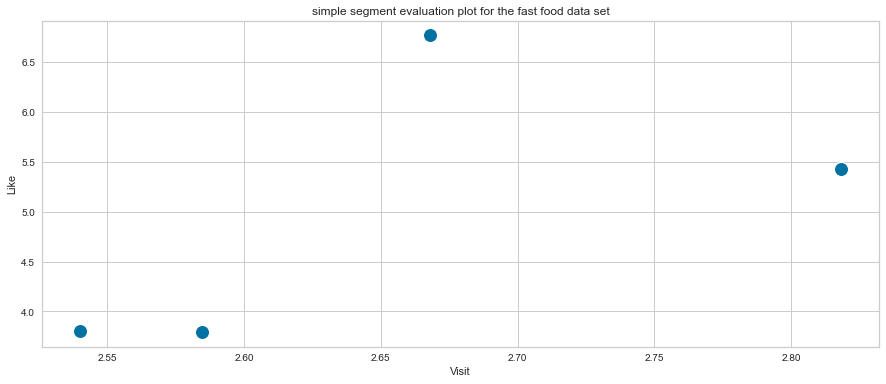

In [148]:
#Target segments

plt.figure(figsize = (15,6))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment, s=200, color="b")
plt.title("simple segment evaluation plot for the fast food data set") 
plt.xlabel("Visit") 
plt.ylabel("Like") 
plt.show()